In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image

from model import LeNet

In [ ]:
def main():
    # 对图像进行预处理
    transform = transforms.Compose(
        [transforms.Resize((32, 32)),  # 将图片resize转换为32×32大小
         transforms.ToTensor(),  # 转换成tensor
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  # 标准化处理

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # 实例化模型
    net = LeNet()
    # 加载训练好的模型的权重参数
    net.load_state_dict(torch.load('Lenet.pth'))

    # 使用PIL里的Image库打开图片
    # im = Image.open('1.jpg')
    #  this image has an additional alpha channel per pixel, thus it has 4 channels instead of only three.
    im = Image.open('1.jpg').convert('RGB')
    # 需要对图片进行预处理,转换成正确的格式
    im = transform(im)  # 预处理之后得到的格式为[C, H, W], pytorch tensor要求的顺序是[batch,channel,height,width],所以还缺少一个维度
    im = torch.unsqueeze(im, dim=0)  # 这行代码作用是在上一行基础上再添加新维度[N, C, H, W]

    # 预测环节,不需要求梯度
    with torch.no_grad():
        outputs = net(im)
        predict = torch.max(outputs, dim=1)[1].numpy()
        predict_pro = torch.softmax(outputs, dim=1)  # softmax是二分类函数sigmoid在多分类上的推广，目的是将多分类的结果以概率的形式展现出来
    print(classes[int(predict)])  # 将index传入classes数组
    print(predict_pro)  # 打印概率

In [ ]:
if __name__ == '__main__':
    main()

运行结果

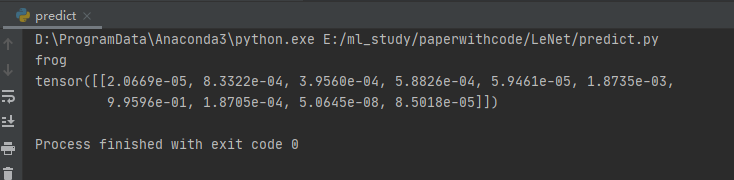

有些小问题,我是用的图片是卡通图片，这里一开始报错说该图片有四个通道，后边转换成RGB解决

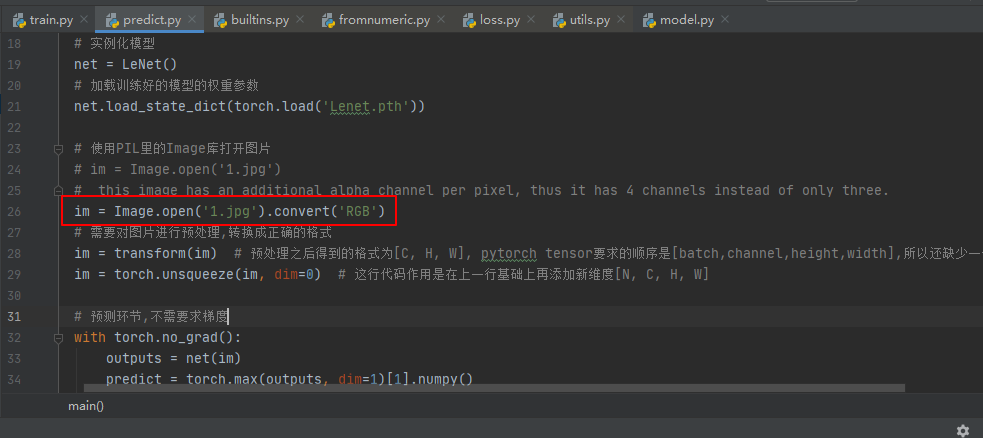